## Panda trolls

In this assignment, you will analyze a sample of 50,000 Russian troll tweets. You can answer each question in the cell space provided in this notebook or start a new notebook.

As part of analysis of Russian influence in the 2016 U.S. presidential election, FiveThirtyEight released almost [three million russian troll tweets](https://fivethirtyeight.com/features/why-were-sharing-3-million-russian-troll-tweets/). FiveThirtyEight obtained the data from Clemson University researchers [Darren Linvill](https://www.clemson.edu/cbshs/faculty-staff/profiles/darrenl) and [Patrick Warren](http://pwarren.people.clemson.edu/). Tweets were collected from accounts identified in the  [November 2017](https://democrats-intelligence.house.gov/uploadedfiles/exhibit_b.pdf) and [June 2018](https://democrats-intelligence.house.gov/uploadedfiles/ira_handles_june_2018.pdf) lists of Internet Research Agency-connected handles [provided to Congress](https://democrats-intelligence.house.gov/news/documentsingle.aspx?DocumentID=396) by Twitter. You can access the FiveThirtyEight repository for a comlete description of the data.


Variables in the file include:

Name | Definition
---|---------
`external_author_id` | An author account ID from Twitter 
`author` | The handle sending the tweet
`content` | The text of the tweet
`region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?id=000199367&type=1)
`language` | The language of the tweet
`publish_date` | The date and time the tweet was sent
`harvested_date` | The date and time the tweet was collected by Social Studio
`following` | The number of accounts the handle was following at the time of the tweet
`followers` | The number of followers the handle had at the time of the tweet
`updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
`post_type` | Indicates if the tweet was a retweet or a quote-tweet
`account_type` | Specific account theme, as coded by Linvill and Warren
`retweet` | A binary indicator of whether or not the tweet is a retweet
`account_category` | General account theme, as coded by Linvill and Warren
`new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018
`alt_external_id` | Reconstruction of author account ID from Twitter, derived from `article_url` variable and the first list provided to Congress
`tweet_id` | Unique id assigned by twitter to each status update, derived from `article_url`
`article_url` | Link to original tweet. Now redirects to "Account Suspended" page
`tco1_step1` | First redirect for the first http(s)://t.co/ link in a tweet, if it exists
`tco2_step1` | First redirect for the second http(s)://t.co/ link in a tweet, if it exists
`tco3_step1` | First redirect for the third http(s)://t.co/ link in a tweet, if it exists


### Part I
**Load the dataset as a pandas dataframe.** 
The dataset is available in the [`data`](https://github.com/nealcaren/KULeuvenBigData/tree/master/notebooks/data) folder on the course [Github site](https://github.com/nealcaren/KULeuvenBigData/). You can also access it directly from this URL:
https://raw.githubusercontent.com/nealcaren/KULeuvenBigData/master/notebooks/data/ira_sample_50k.csv

Hint:
* Remember to `import` pandas. 
* Pandas can load a file from a local directory or from a URL.

In [1]:
import pandas as pd

In [2]:
troll_df = pd.read_csv('data/ira_sample_50k.csv')

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nealcaren/KULeuvenBigData/master/notebooks/data/ira_sample_50k.csv'

troll_df = pd.read_csv(url)

### Part II

After inspecting the dataframe, answer the following questions.



In [4]:
troll_df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,1653442950,EMMETTMTH,Former Rep. Walsh Tweets Father's Day Message ...,United States,English,6/22/2015 0:12,6/22/2015 0:12,42,70,617,...,Right,1,RightTroll,0,1653442950,612775177047244801,http://twitter.com/EmmettMth/statuses/61277517...,NaN,NaN,NaN
1,854000000000000000,HANNOVER_BOTE,Integration: Uetze lernt von Schweden https://...,United States,German,10/10/2017 12:59,10/10/2017 12:59,312,179,1895,...,German,0,NonEnglish,0,853871825251688448,917736346759856133,http://twitter.com/853871825251688448/statuses...,https://twitter.com/Hannover_Bote/status/91773...,http://www.haz.de/Hannover/Aus-der-Region/Uetz...,NaN
2,2426235844,DEMIDOVDMITRII,В Москве автомобиль сбил беременную женщину и ...,United States,Russian,9/20/2015 19:31,9/20/2015 19:31,1550,459,3523,...,Russian,1,NonEnglish,1,2426235844,645681644653944833,http://twitter.com/demidovdmitrii/statuses/645...,http://www.gazeta.ru/auto/news/2015/09/20/n_76...,NaN,NaN
3,3899481526,TODAYINSYRIA,Egypt Deports French Journalist Amid Crackdown...,United Kingdom,English,5/25/2016 16:28,5/25/2016 16:28,6929,18863,5174,...,news,0,NewsFeed,0,3899481526,735507769902563328,http://twitter.com/todayinsyria/statuses/73550...,http://bit.ly/1WTlPkx,NaN,NaN
4,3074563039,STLOUISONLINE,Municipal court changes poised to move forward...,United States,English,4/11/2016 20:03,4/11/2016 20:03,4729,8136,13168,...,local,0,NewsFeed,0,3074563039,719616888796422148,http://twitter.com/StLouisOnline/statuses/7196...,NaN,NaN,NaN


In [5]:
troll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
external_author_id    50000 non-null int64
author                50000 non-null object
content               50000 non-null object
region                49843 non-null object
language              50000 non-null object
publish_date          50000 non-null object
harvested_date        50000 non-null object
following             50000 non-null int64
followers             50000 non-null int64
updates               50000 non-null int64
post_type             21917 non-null object
account_type          50000 non-null object
retweet               50000 non-null int64
account_category      50000 non-null object
new_june_2018         50000 non-null int64
alt_external_id       50000 non-null int64
tweet_id              50000 non-null int64
article_url           50000 non-null object
tco1_step1            35825 non-null object
tco2_step1            12156 non-null object
tco3_step1         

In [6]:
troll_df.describe()

,external_author_id,following,followers,updates,retweet,new_june_2018,alt_external_id,tweet_id
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,5.000000e+04,5.000000e+04
mean,1.273233e+17,3446.866700,7025.970420,10586.753980,0.438340,0.21284,1.273355e+17,7.597890e+17
std,3.012598e+17,5616.629783,14363.372185,17966.244128,0.496188,0.40932,3.012889e+17,9.647651e+16
min,8.758894e+07,0.000000,0.000000,1.000000,0.000000,0.00000,8.758894e+07,1.672898e+17
25%,1.905260e+09,322.000000,315.000000,1806.000000,0.000000,0.00000,1.905260e+09,6.730155e+17
50%,2.586507e+09,1481.000000,1255.500000,4384.000000,0.000000,0.00000,2.586507e+09,7.753215e+17
75%,3.254274e+09,4751.000000,10928.000000,12470.000000,1.000000,0.00000,3.254274e+09,8.384575e+17
max,9.812510e+17,76130.000000,245274.000000,166016.000000,1.000000,1.00000,9.812509e+17,1.001648e+18


* **How many columns in the dataset?**

Hint: 
* `len` can be used to compute the length of a list.

In [7]:
troll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
external_author_id    50000 non-null int64
author                50000 non-null object
content               50000 non-null object
region                49843 non-null object
language              50000 non-null object
publish_date          50000 non-null object
harvested_date        50000 non-null object
following             50000 non-null int64
followers             50000 non-null int64
updates               50000 non-null int64
post_type             21917 non-null object
account_type          50000 non-null object
retweet               50000 non-null int64
account_category      50000 non-null object
new_june_2018         50000 non-null int64
alt_external_id       50000 non-null int64
tweet_id              50000 non-null int64
article_url           50000 non-null object
tco1_step1            35825 non-null object
tco2_step1            12156 non-null object
tco3_step1         

In [8]:
len(troll_df.keys())

21

* **What percent of the tweets had links?**


In [36]:
troll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
external_author_id    50000 non-null int64
author                50000 non-null object
content               50000 non-null object
region                49843 non-null object
language              50000 non-null object
publish_date          50000 non-null object
harvested_date        50000 non-null object
following             50000 non-null int64
followers             50000 non-null int64
updates               50000 non-null int64
post_type             21917 non-null object
account_type          50000 non-null object
retweet               50000 non-null int64
account_category      50000 non-null object
new_june_2018         50000 non-null int64
alt_external_id       50000 non-null int64
tweet_id              50000 non-null int64
article_url           50000 non-null object
tco1_step1            35825 non-null object
tco2_step1            12156 non-null object
tco3_step1         

In [10]:
troll_df['tco1_step1'].describe()

count                35825
unique               34825
top       http://1063.mobi
freq                    66
Name: tco1_step1, dtype: object

In [11]:
len(troll_df)

50000

In [12]:
35825/50000

0.7165

In [13]:
troll_df['tco1_step1'].describe()['count'] / len(troll_df)

0.7165

* **How many of the tweets are tagged `RightTroll`?**


In [14]:
troll_df['account_category'].value_counts()

NonEnglish      13925
RightTroll      11945
NewsFeed        10279
LeftTroll        7277
HashtagGamer     4036
Commercial       2118
Unknown           230
Fearmonger        190
Name: account_category, dtype: int64

In [37]:
troll_df['account_category'].value_counts()['RightTroll']

11945

* **What is the median number of following accounts?**

In [15]:
troll_df['following'].describe()

count    50000.000000
mean      3446.866700
std       5616.629783
min          0.000000
25%        322.000000
50%       1481.000000
75%       4751.000000
max      76130.000000
Name: following, dtype: float64

### Part III

* **Plot a histogram of the number of follower accounts.**

Hint:
* Remember to enable graph displays in a notebook.


In [16]:
%matplotlib inline

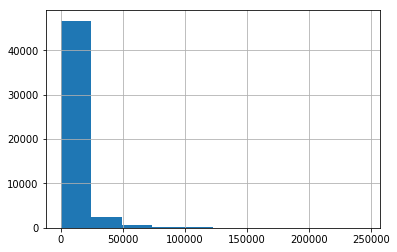

In [17]:
troll_df['followers'].hist()

In [18]:
troll_df['followers'].describe()

count     50000.000000
mean       7025.970420
std       14363.372185
min           0.000000
25%         315.000000
50%        1255.500000
75%       10928.000000
max      245274.000000
Name: followers, dtype: float64

* **Plot a histogram of the date the tweets were published, using 100 bins.**

In [19]:
troll_df['publish_date'].describe()

count              50000
unique             47095
top       9/3/2017 18:21
freq                   5
Name: publish_date, dtype: object

In [20]:
troll_df['date'] = pd.to_datetime(troll_df['publish_date'])

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


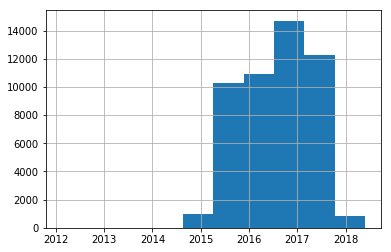

In [21]:
troll_df['date'].hist()

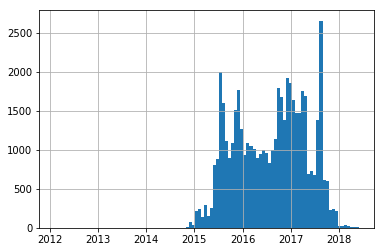

In [22]:
troll_df['date'].hist(bins=100)

### Part IV

* **Create a new variable `tweet_length` that is the number of words in the tweet (`content`).**

Hint:
* This requires you to `apply` a function that you create.

In [23]:
content = 'Egypt Deports French Journalist Amid Crackdown on the Media'

In [24]:
content_words = content.split()
print(content_words)

['Egypt', 'Deports', 'French', 'Journalist', 'Amid', 'Crackdown', 'on', 'the', 'Media']


In [25]:
word_count = len(content_words)
print(word_count)

9


In [26]:
def word_counter(content):
    content_words = content.split()
    word_count = len(content_words)
    return word_count

![](images/function.png)

In [27]:
word_counter(content)

9

In [28]:
word_counter('The birds are chirping.')

4

In [29]:
troll_df['content'].apply(word_counter)

0        22
1         7
2        13
3        10
4        11
5        15
6         4
7        10
8        13
9        22
10       11
11       19
12       11
13       11
14       10
15       11
16        2
17       15
18       19
19       13
20       15
21        9
22       17
23       16
24        6
25       11
26       21
27       11
28       11
29        7
         ..
49970    22
49971     1
49972    12
49973     3
49974     4
49975    18
49976     8
49977    13
49978    15
49979     7
49980    13
49981    20
49982     4
49983     7
49984    12
49985    11
49986    23
49987    16
49988    17
49989     7
49990    21
49991    11
49992     9
49993    13
49994    14
49995     8
49996     4
49997    16
49998     8
49999     5
Name: content, Length: 50000, dtype: int64

In [30]:
troll_df['tweet_length'] = troll_df['content'].apply(word_counter)

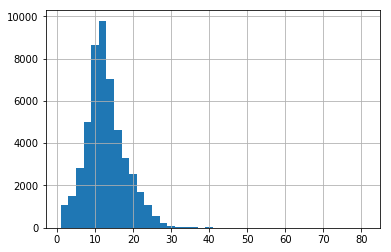

In [31]:
troll_df['tweet_length'].hist(bins=40)

* **Create a new variable `first_word` that is the first word of the tweet (`content`).**

Hint:
* This requires you to `apply` a function that you create.

In [32]:
def first_word(content):
    content_words = content.split()
    first_word = content_words[0]
    return first_word

In [33]:
first_word(content)

'Egypt'

In [34]:
troll_df['first_word'] = troll_df['content'].apply(first_word)

In [35]:
troll_df['first_word'].value_counts()[:10]

RT          1148
В            925
The          739
I            497
Trump        273
This         264
A            227
#TopNews     226
New          222
Man          215
Name: first_word, dtype: int64